In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [2]:
from selenium import webdriver
import time

In [5]:
election_result = pd.read_csv('../data/06. election_result.csv', encoding='utf-8', index_col=0)
election_result.head()

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512,22325,22313
1,서울특별시,중구,82852,34062,17901,19372
2,서울특별시,용산구,148157,58081,35230,32109
3,서울특별시,성동구,203175,86686,40566,45674
4,서울특별시,광진구,240030,105512,46368,52824


In [6]:
sido_candi = election_result['광역시도']
sido_candi = [name[:2] if name[:2] in ['서울','부산','대구','광주','인천','대전','울산']
              else '' for name in sido_candi]

In [7]:
def cut_char_sigu(name):
    return name if len(name)==2 else name[:-1]

In [8]:
import re

sigun_candi = ['']*len(election_result)

for n in election_result.index:
    each = election_result['시군'][n]
    if each[:2] in ['수원','성남','안양','안산','고양','용인','청주','천안','전주','포항','창원']:
        sigun_candi[n] = re.split('시', each)[0]+' '+cut_char_sigu(re.split('시', each)[1])
    else:
        sigun_candi[n] = cut_char_sigu(each)
    
sigun_candi

['종로',
 '중구',
 '용산',
 '성동',
 '광진',
 '동대문',
 '중랑',
 '성북',
 '강북',
 '도봉',
 '노원',
 '은평',
 '서대문',
 '마포',
 '양천',
 '강서',
 '구로',
 '금천',
 '영등포',
 '동작',
 '관악',
 '서초',
 '강남',
 '송파',
 '강동',
 '중구',
 '서구',
 '동구',
 '영도',
 '부산진',
 '동래',
 '남구',
 '북구',
 '해운대',
 '기장',
 '사하',
 '금정',
 '강서',
 '연제',
 '수영',
 '사상',
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성',
 '달서',
 '달성',
 '중구',
 '동구',
 '남구',
 '연수',
 '남동',
 '부평',
 '계양',
 '서구',
 '강화',
 '옹진',
 '동구',
 '서구',
 '남구',
 '북구',
 '광산',
 '동구',
 '중구',
 '서구',
 '유성',
 '대덕',
 '중구',
 '남구',
 '동구',
 '북구',
 '울주',
 '세종특별자치',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남',
 '파주',
 '여주',
 '이천',
 '용인 처인',
 '용인 수지',
 '용인 기흥',
 '안성',
 '김포',
 '광주',
 '포천',
 '연천',
 '양평',
 '가평',
 '춘천',
 '원주',
 '강릉',
 '동해',
 '삼척',
 '태백',
 '정선',
 '속초',
 '고성',
 '양양',
 '인제',
 '홍천',
 '횡성',
 '영월',
 '평창',
 '화천',
 '양구

In [9]:
ID_candi = [sido_candi[n]+' '+sigun_candi[n] for n in range(0,len(sigun_candi))]

ID_candi = [name[1:] if name[0]==' ' else name for name in ID_candi]
ID_candi = [name[:2] if name[:2]=='세종' else name for name in ID_candi]

ID_candi

['서울 종로',
 '서울 중구',
 '서울 용산',
 '서울 성동',
 '서울 광진',
 '서울 동대문',
 '서울 중랑',
 '서울 성북',
 '서울 강북',
 '서울 도봉',
 '서울 노원',
 '서울 은평',
 '서울 서대문',
 '서울 마포',
 '서울 양천',
 '서울 강서',
 '서울 구로',
 '서울 금천',
 '서울 영등포',
 '서울 동작',
 '서울 관악',
 '서울 서초',
 '서울 강남',
 '서울 송파',
 '서울 강동',
 '부산 중구',
 '부산 서구',
 '부산 동구',
 '부산 영도',
 '부산 부산진',
 '부산 동래',
 '부산 남구',
 '부산 북구',
 '부산 해운대',
 '부산 기장',
 '부산 사하',
 '부산 금정',
 '부산 강서',
 '부산 연제',
 '부산 수영',
 '부산 사상',
 '대구 중구',
 '대구 동구',
 '대구 서구',
 '대구 남구',
 '대구 북구',
 '대구 수성',
 '대구 달서',
 '대구 달성',
 '인천 중구',
 '인천 동구',
 '인천 남구',
 '인천 연수',
 '인천 남동',
 '인천 부평',
 '인천 계양',
 '인천 서구',
 '인천 강화',
 '인천 옹진',
 '광주 동구',
 '광주 서구',
 '광주 남구',
 '광주 북구',
 '광주 광산',
 '대전 동구',
 '대전 중구',
 '대전 서구',
 '대전 유성',
 '대전 대덕',
 '울산 중구',
 '울산 남구',
 '울산 동구',
 '울산 북구',
 '울산 울주',
 '세종',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남'

In [10]:
election_result['ID'] = ID_candi
election_result.head(10)

,광역시도,시군,pop,moon,hong,ahn,ID
0,서울특별시,종로구,102566,42512,22325,22313,서울 종로
1,서울특별시,중구,82852,34062,17901,19372,서울 중구
2,서울특별시,용산구,148157,58081,35230,32109,서울 용산
3,서울특별시,성동구,203175,86686,40566,45674,서울 성동
4,서울특별시,광진구,240030,105512,46368,52824,서울 광진
5,서울특별시,동대문구,236092,98958,51631,53359,서울 동대문
6,서울특별시,중랑구,265706,111450,56545,62778,서울 중랑
7,서울특별시,성북구,295866,129263,57584,66518,서울 성북
8,서울특별시,강북구,210614,89645,42268,51669,서울 강북
9,서울특별시,도봉구,229233,94898,47461,55600,서울 도봉


In [12]:
election_result[['rate_moon','rate_hong','rate_ahn']] = election_result[['moon','hong','ahn']].div(election_result['pop'], axis=0)
election_result[['rate_moon','rate_hong','rate_ahn']] *= 100
election_result

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
0,서울특별시,종로구,102566,42512,22325,22313,서울 종로,41.448433,21.766472,21.754773
1,서울특별시,중구,82852,34062,17901,19372,서울 중구,41.111862,21.605996,23.381451
2,서울특별시,용산구,148157,58081,35230,32109,서울 용산,39.202333,23.778829,21.672280
3,서울특별시,성동구,203175,86686,40566,45674,서울 성동,42.665682,19.966039,22.480128
4,서울특별시,광진구,240030,105512,46368,52824,서울 광진,43.957839,19.317585,22.007249
5,서울특별시,동대문구,236092,98958,51631,53359,서울 동대문,41.915016,21.869017,22.600935
6,서울특별시,중랑구,265706,111450,56545,62778,서울 중랑,41.944856,21.281040,23.626866
7,서울특별시,성북구,295866,129263,57584,66518,서울 성북,43.689711,19.462865,22.482475
8,서울특별시,강북구,210614,89645,42268,51669,서울 강북,42.563647,20.068941,24.532557
9,서울특별시,도봉구,229233,94898,47461,55600,서울 도봉,41.398054,20.704262,24.254798


In [13]:
election_result.sort_values(['rate_moon'], ascending=[False]).head(10)

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
182,전라남도,순천시,181451,122595,4525,40429,순천,67.563695,2.493786,22.280946
166,전라북도,전주시덕진구,187921,125375,5183,40188,전주 덕진,66.716865,2.758074,21.385582
165,전라북도,전주시완산구,236383,157637,7003,50506,전주 완산,66.687114,2.962565,21.366173
175,전라북도,장수군,16079,10714,717,3353,장수,66.633497,4.459233,20.853287
184,전라남도,광양시,96384,63544,4100,20080,광양,65.927955,4.253818,20.833333
173,전라북도,진안군,18107,11918,819,3904,진안,65.819849,4.523113,21.560722
172,전라북도,완주군,62470,41057,2107,13897,완주,65.722747,3.372819,22.245878
168,전라북도,익산시,192208,123422,6470,45737,익산,64.212728,3.366145,23.795576
170,전라북도,남원시,55371,35539,1939,13854,남원,64.183417,3.501833,25.020317
63,광주광역시,광산구,248209,159119,3630,65402,광주 광산,64.106862,1.462477,26.349568


In [15]:
draw_korea = pd.read_csv('../data/05. draw_korea.csv',encoding='utf-8',index_col=0)
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [16]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'고성(강원)', '고성(경남)', '부천 소사', '부천 오정', '부천 원미', '창원 합포', '창원 회원'}

In [17]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

{'고성', '부천', '창원 마산합포', '창원 마산회원'}

In [18]:
election_result[election_result['ID'] == '고성']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
125,강원도,고성군,18692,5664,6511,3964,고성,30.301733,34.833084,21.206933
233,경상남도,고성군,34603,9848,16797,4104,고성,28.459960,48.542034,11.860243


In [19]:
election_result.loc[125, 'ID'] = '고성(강원)'
election_result.loc[233, 'ID'] = '고성(경남)'
election_result[election_result['시군'] == '고성군']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
125,강원도,고성군,18692,5664,6511,3964,고성(강원),30.301733,34.833084,21.206933
233,경상남도,고성군,34603,9848,16797,4104,고성(경남),28.459960,48.542034,11.860243


In [20]:
election_result[election_result['광역시도'] == '경상남도']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
226,경상남도,창원시의창구,164047,60757,56887,22830,창원 의창,37.036337,34.677257,13.916743
227,경상남도,창원시성산구,153327,63717,42052,22923,창원 성산,41.556282,27.426350,14.950400
228,경상남도,창원시마산합포구,119281,35592,54488,14686,창원 마산합포,29.838784,45.680368,12.312103
229,경상남도,창원시마산회원구,136757,45014,56340,17744,창원 마산회원,32.915317,41.197160,12.974839
230,경상남도,창원시진해구,114779,41249,40049,17435,창원 진해,35.937759,34.892271,15.190061
231,경상남도,진주시,222813,73929,93751,26687,진주,33.179841,42.076091,11.977308
232,경상남도,통영시,82855,25477,36128,10738,통영,30.748899,43.603886,12.959990
233,경상남도,고성군,34603,9848,16797,4104,고성(경남),28.459960,48.542034,11.860243
234,경상남도,사천시,71555,22370,32475,8350,사천,31.262665,45.384669,11.669345
235,경상남도,김해시,318253,147972,82880,45126,김해,46.495084,26.042174,14.179285


In [21]:
election_result.loc[228, 'ID'] = '창원 합포'
election_result.loc[229, 'ID'] = '창원 회원'

election_result[election_result['광역시도'] == '경상남도']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
226,경상남도,창원시의창구,164047,60757,56887,22830,창원 의창,37.036337,34.677257,13.916743
227,경상남도,창원시성산구,153327,63717,42052,22923,창원 성산,41.556282,27.426350,14.950400
228,경상남도,창원시마산합포구,119281,35592,54488,14686,창원 합포,29.838784,45.680368,12.312103
229,경상남도,창원시마산회원구,136757,45014,56340,17744,창원 회원,32.915317,41.197160,12.974839
230,경상남도,창원시진해구,114779,41249,40049,17435,창원 진해,35.937759,34.892271,15.190061
231,경상남도,진주시,222813,73929,93751,26687,진주,33.179841,42.076091,11.977308
232,경상남도,통영시,82855,25477,36128,10738,통영,30.748899,43.603886,12.959990
233,경상남도,고성군,34603,9848,16797,4104,고성(경남),28.459960,48.542034,11.860243
234,경상남도,사천시,71555,22370,32475,8350,사천,31.262665,45.384669,11.669345
235,경상남도,김해시,318253,147972,82880,45126,김해,46.495084,26.042174,14.179285


In [22]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'부천 소사', '부천 오정', '부천 원미'}

In [23]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

{'부천'}

In [24]:
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
85,경기도,부천시,543777,239697,100544,128297,부천,44.080018,18.489932,23.593679


In [25]:
election_result.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
245,경상남도,산청군,24513,6561,12544,2753,산청,26.765390,51.172847,11.230776
246,경상남도,거창군,41325,11256,19976,4923,거창,27.237750,48.338778,11.912886
247,경상남도,합천군,33021,7143,19699,3077,합천,21.631689,59.655976,9.318313
248,제주특별자치도,제주시,273163,125717,48027,55971,제주,46.022704,17.581810,20.489964
249,제주특별자치도,서귀포시,101296,43776,20036,21890,서귀포,43.215922,19.779656,21.609935


In [26]:
ahn_tmp = election_result.loc[85, 'ahn']/3
hong_tmp = election_result.loc[85, 'hong']/3
moon_tmp = election_result.loc[85, 'moon']/3
pop_tmp = election_result.loc[85, 'pop']/3

rate_moon_tmp = election_result.loc[85, 'rate_moon']
rate_hong_tmp = election_result.loc[85, 'rate_hong']
rate_ahn_tmp = election_result.loc[85, 'rate_ahn']

election_result.loc[250] = [ahn_tmp, hong_tmp, moon_tmp, pop_tmp, 
                           '경기도', '부천시', '부천 소사', 
                           rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]
election_result.loc[251] = [ahn_tmp, hong_tmp, moon_tmp, pop_tmp, 
                           '경기도', '부천시', '부천 오정', 
                           rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]
election_result.loc[252] = [ahn_tmp, hong_tmp, moon_tmp, pop_tmp, 
                           '경기도', '부천시', '부천 원미', 
                           rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]

In [27]:
election_result[election_result['시군']=='부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
85,경기도,부천시,543777.0,239697.0,100544,128297,부천,44.080018,18.489932,23.593679


In [28]:
election_result.drop([85], inplace=True)
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn


In [29]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

set()

In [30]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

set()

In [31]:
final_elect_data = pd.merge(election_result, draw_korea, how='left', on=['ID'])
final_elect_data.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn,y,x
0,서울특별시,종로구,102566.0,42512.0,22325,22313,서울 종로,41.448433,21.766472,21.754773,4,6
1,서울특별시,중구,82852.0,34062.0,17901,19372,서울 중구,41.111862,21.605996,23.381451,5,6
2,서울특별시,용산구,148157.0,58081.0,35230,32109,서울 용산,39.202333,23.778829,21.672280,6,6
3,서울특별시,성동구,203175.0,86686.0,40566,45674,서울 성동,42.665682,19.966039,22.480128,5,7
4,서울특별시,광진구,240030.0,105512.0,46368,52824,서울 광진,43.957839,19.317585,22.007249,6,7


In [33]:
final_elect_data['moon_vs_hong'] = final_elect_data['rate_moon'] - final_elect_data['rate_hong']
final_elect_data['moon_vs_ahn'] = final_elect_data['rate_moon'] - final_elect_data['rate_ahn']
final_elect_data['ahn_vs_hong'] = final_elect_data['rate_ahn'] - final_elect_data['rate_hong']
final_elect_data.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn,y,x,moon_vs_hong,moon_vs_ahn,ahn_vs_hong
0,서울특별시,종로구,102566.0,42512.0,22325,22313,서울 종로,41.448433,21.766472,21.754773,4,6,19.681961,19.693661,-0.011700
1,서울특별시,중구,82852.0,34062.0,17901,19372,서울 중구,41.111862,21.605996,23.381451,5,6,19.505866,17.730411,1.775455
2,서울특별시,용산구,148157.0,58081.0,35230,32109,서울 용산,39.202333,23.778829,21.672280,6,6,15.423503,17.530053,-2.106549
3,서울특별시,성동구,203175.0,86686.0,40566,45674,서울 성동,42.665682,19.966039,22.480128,5,7,22.699643,20.185554,2.514089
4,서울특별시,광진구,240030.0,105512.0,46368,52824,서울 광진,43.957839,19.317585,22.007249,6,7,24.640253,21.950590,2.689664


In [34]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
    [(27,5), (27,6), (25,6)],
]

In [35]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

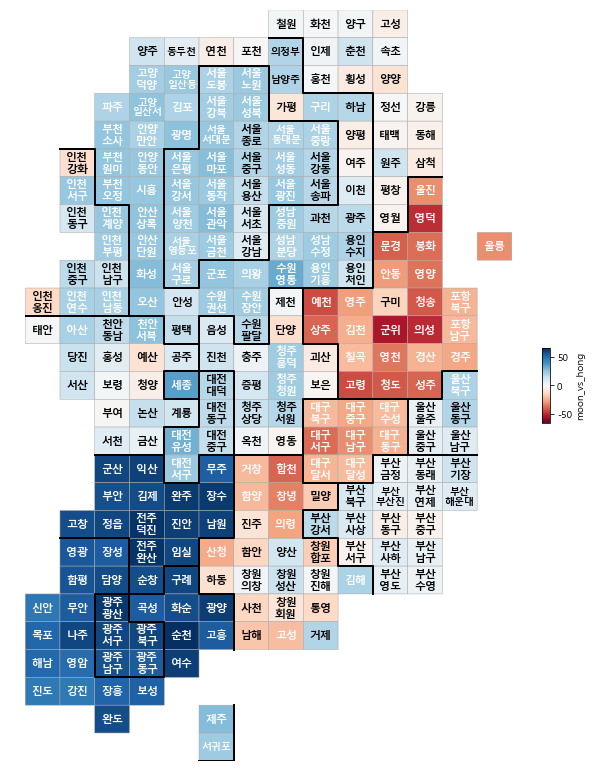

In [36]:
drawKorea('moon_vs_hong', final_elect_data, 'RdBu')

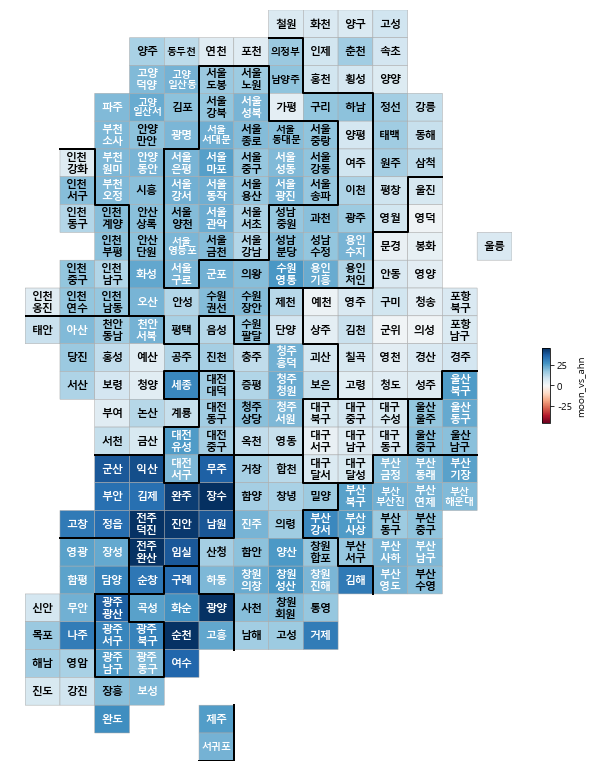

In [37]:
drawKorea('moon_vs_ahn', final_elect_data, 'RdBu')

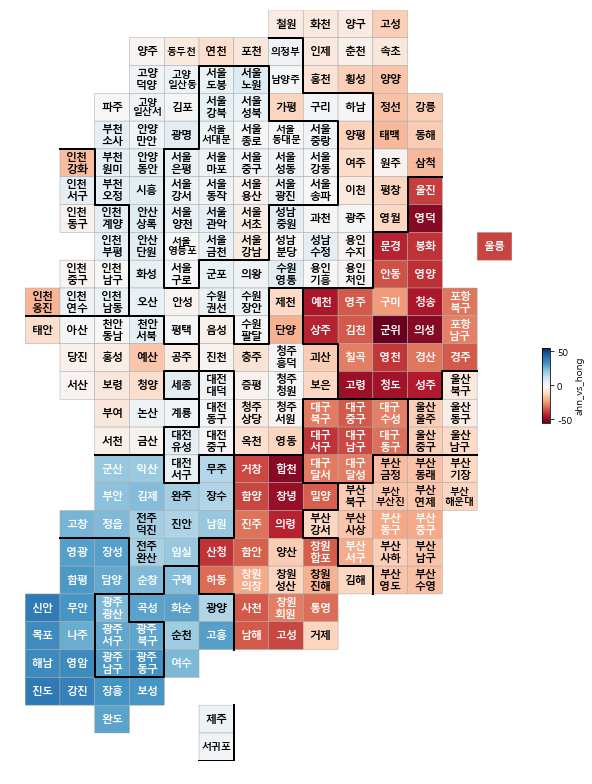

In [38]:
drawKorea('ahn_vs_hong', final_elect_data, 'RdBu')

In [39]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [40]:
pop_folium = final_elect_data.set_index('ID')

del pop_folium['광역시도']
del pop_folium['시군']

pop_folium.head()

,pop,moon,hong,ahn,rate_moon,rate_hong,rate_ahn,y,x,moon_vs_hong,moon_vs_ahn,ahn_vs_hong
ID,,,,,,,,,,,,
서울 종로,102566.0,42512.0,22325,22313,41.448433,21.766472,21.754773,4,6,19.681961,19.693661,-0.011700
서울 중구,82852.0,34062.0,17901,19372,41.111862,21.605996,23.381451,5,6,19.505866,17.730411,1.775455
서울 용산,148157.0,58081.0,35230,32109,39.202333,23.778829,21.672280,6,6,15.423503,17.530053,-2.106549
서울 성동,203175.0,86686.0,40566,45674,42.665682,19.966039,22.480128,5,7,22.699643,20.185554,2.514089
서울 광진,240030.0,105512.0,46368,52824,43.957839,19.317585,22.007249,6,7,24.640253,21.950590,2.689664


In [42]:
geo_path = '../data/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['moon_vs_hong'],
               columns = [pop_folium.index, pop_folium['moon_vs_hong']],
               fill_color = 'PuBu', #PuRd, YlGnBu
               key_on = 'feature.id')

map